# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
**Выполнила студентка гр.9304 Рослова Лариса, Вариант 38**

---

## Цель работы 
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

---

## Основные теоретические положения

**`Аддитивная цепочка`** - последовательность натуральных чисел, начинающаяся с единицы, в которой каждый последующий элемент является суммой каких-то двух предшествующих элементов (в том числе, возможно использование одного и того же предшествующего элемента — удвоение).


**`Звёздная цепочка`** - это аддитивная цепочка, обладающая свойством: $ \forall i \in \{1, 2, \dots, m\}: a_{i} = a_{i - 1} + a_{k} $, где $ k \in \{0, 1, \dots, i - 1\} $. $ l^{*} \left( n \right) = m $ — длина минимальной звёздной цепочки ($ l^{*} \left( n \right) \geq l \left( n \right) $).


### Бинарный метод

Бинарный метод возведения в степень - метод, который позвоялет возвести любое число в степень за $ O(log n) $ умножений (вместо $n$ умножений при обычном перемножении числа на само себя.
Для любого числа a и чётного числа $n$ выполнимо очевидное тождество (следующее из ассоциативности операции умножения): $a^n = (a^{n/2})^2 = a^{n/2} \cdot a^{n/2} $
Если степень $n$ нечётна, то нужно перейти к степени $n-1$, которая будет уже чётной, и следом домножить число на себя: $a^n = a^{n-1} \cdot a$.

Число операций бинарного метода равно $ \lambda \left( n \right) + \nu \left( n \right) - 1 $, где $ \lambda \left( n \right) = \left\lfloor \mathrm{lb}\,n \right\rfloor $, $ \nu \left( n \right) $ — вес Хэмминга — количество ненулевых символов в двоичной записи числа.

### Метод множителей

При вычислении $x^i$ за $n$ операций, а $y^j$ за $m$ операций, где $(x^i)^j = x^{i*j}$ мы сможем вычислить за $n+m$ операций. 
$i$ - это наименьший простой множитель степени $k$, в которую необходимо возвести число. Если же $k$ изначально простая степень, то считаем $x^{k-1}$ и затем домножаем на $x$.

### Алгоритм Яо для вычисления приближённых аддитивных цепочек

Пусть имеются натуральное число $ n $ и параметр $ k \geq 2 $. Пусть $ n = \displaystyle\sum\limits_{i = 0}^{j} 2^{ik} a_{i} $. Введём функцию $ d \left( z \right) = \displaystyle\sum\limits_{i: a_{i} = z} 2^{ik} $.

Цепочка Яо для натурального числа $ n $ и некоторого параметра $ k $ начинается со степеней двоек: $ Y_{k} \left( n \right) = \left\{ 1, 2, 4, \dots, 2^{\lambda \left( n \right)} \right\} $, после чего для всех $ z \in \left\{ 1, 2, \dots, 2^{k} - 1 \right\} $ вычисляются $ d \left( z \right) \ne 0 $ и $ z d\left( z \right) $. Тогда $ n = \displaystyle\sum\limits_{z = 1}^{2^{k} - 1} z d \left( z \right) $.

Вычислительная сложность алгоритма Яо:$$lb(n) + \frac {(1+o(1))*lb(n)}{lb(lb(n))}$$

### Алгоритм Брауэра

`Теорема Брауэра`
При некотором $ k < \mathrm{lb}\,\mathrm{lb}\,n $ справедливо следующее неравенство: $ l \left( n \right) < \left( 1 + k^{-1} \right) \left\lceil \mathrm{lb}\,n \right\rceil + 2^{k - 1} - k + 2 $.

Положим $ k := \lambda \left( \lambda \left( n \right) \right) - 2 \lambda \left( \lambda \left( \lambda \left( n \right) \right) \right) $, тогда получим следующие следствия из теоремы Брауэра:

Следствие 1: $\lim \limits_{n \to \infty} \frac{l(n)}{\lambda(n)}=1$

Следствие 2: Одна из наилучших верхних оценкок для длины аддитивной цепочки имеет следующий вид:
$\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o(\lambda(\lambda(\lambda(n))))}{\lambda(\lambda(n))^2})$

`Алгоритм Брауэра`

Брауэрскую цепочку для натурального числа $ n $ и некоторого параметра $ k \geq 2 $ можно задать рекуррентной формулой:

где $ q = \left\lfloor \dfrac{n}{2^{k}} \right\rfloor $.

Пусть $ n = \displaystyle\sum\limits_{i = 0}^{j} 2^{ik} a_{i} $, $ a_{j} \ne 0 $. Тогда $ B_{k} \left( n \right) = 1 $, $ 2 $, $ \dots $, $ 2^{k} - 1 $, $ 2 a_{j} $, $ 4a_{j} $, $ \dots $, $ 2^{k} a_{j} $, $ 2^{k} a_{j} + a_{j - 1} $, $ 2^{k + 1} a_{j} + 2 a_{j - 1} $, $ \dots $, $ 2^{2k} a_{j} + 2^{k} a_{j - 1} $, $ 2^{2k} a_{j} + 2^{k} a_{j - 1} + a_{j - 2} $, $ \dots $, $ n $.

Длина такой цепочки будет равна $ l_{B} \left( n \right) = j \left( k + 1 \right) + 2^{k} - 2 $, если $ jk \leq \mathrm{lb}\,n < \left( j + 1 \right) k $.

Алгоритм представляет из себя поиск значений $ q_{s} $ и $ r_{i} $ в представлении числа $ n $: $ n = 2^{k} \left( 2^{k} \left( \dots \left( 2 q_{s} + r_{s} \right) \dots \right) + r_{2} \right) + r_{1} $. Тогда $ B_{k} \left( n \right) = 1 $, $ 2 $, $ \dots $, $ 2^{k} - 1 $, $ 2 q_{s} $, $ 4q_{s} $, $ \dots $, $ 2^{k} q_{s} $, $ 2^{k} q_{s} + r_{s} $, $ \dots $, $ n $.

### Алгоритм дробления вектора индексов

Звездная цепочка - это аддитивная цепочка, в которой каждый элемент подчиняется определенному правилу: $a_i=a_{i-1}+a_j$, где $1 \leq j \leq i$

Для каждой звездной цепочки существует вектор индексов - последовательность натуральных чисел, где каждый ее элемент является индексом $j$ в $a_j$ из формулы $a_i=a_{i-1}+a_j$.

Алгоритм дробления вектора индексов заключается в поиске звездной цепочки минимальной длины для заданного числа $n \in N$.

Вначале рассмотрим аддитивные цепочки длины $m$, где $\underline{l}(n) \leq m \leq \overline{l}(n)$, $\underline{l}(n) = \lfloor lb n\rfloor$ и $\overline{l}(n) = \lambda(n) + v(n) - 1$.

На каждом этапе выбираем некое число $ q \in \mathbb{N} $ такое, что $ 1 \leq q \leq m - 1 $. Затем перебираем все $ \left\{ r_{i} \right\}_{i = 1}^{q} $, для которых вычисляем значения $ a_{min} $ и $ a_{max} $.
При равенстве $n$ и $a_{max}$ или $a_{min}$ алгоритм заканчивается.

При $n \in [a_{min}, a_{max}]$ перебираем вектора индексов длины $m - q$, чтобы при добавлении к нашему вектору по получившемуся можно было бы построить аддитивную цепочку с последним элементом $n$.

При $n \not \in [a_{min}, a_{max}]$ возьмем следующий вектор индексов длинной $q$ вместо предыдущего фиксированного.

### Гипотеза Штольца-Брауэра

Для всех звёздных цепочек выполнимо следующее неравенство: $$l ^ * (2 ^  n- 1) \leq l ^ * (n) + n - 1$$

---

## Постановка задачи

Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно проинтерпретировать.
1. Применить бинарный метод и метод множителей для $ x_n $, где $ n \geq 30 $, для 2-3 значений $ n $ (значения $ n $ выбирается самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Яо для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра $ k $, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при $n \geq 500$. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для $n=1..200$ путём построения функции $l(n)$ и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для $1<n \leq 10$ на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

---

## Выполение работы 

### 1. Сравнение бинарного метода и метода множителей для $x^n$ при $n\geqslant30$.

В качестве примера работы двух алгоритмов рассчитаем вручную степень $n=71$.

*Бинарный метод*:

$n = 69_{10} = 1000101_{2} $.

$x \to x \cdot x = x^{2} \to x^{2} \cdot x^{2} = x^{4} \to x^{4} \cdot x^{4} = x^{8} \to x^{8} \cdot x^{8} = x^{16} \to x^{16} \cdot x = x^{17} \to x^{17} \cdot x^{17} = x^{34} \to x^{34} \cdot x^{34} = x^{68} \to xm= x^{69} $. Итого 8 операций.

*Метод множителей:*

1. $ x \to x \cdot x = x^{2} \to x^{2} \cdot x^{2} = x^{4} \to x^{4} \cdot x = x^{5} \to x^{5} \cdot x^{5} = x^{10} \to x^{10} \cdot x = x^{11} \to x^{11} \cdot x^{11} = x^{22} \to x^{22} \cdot x = x^{23} : y  $
2. $ y \to y \cdot y = y^{2} \to y^{2} \cdot y = y^{3}$

Получаем 9 операций.



Для вычислений и сравнения двух методов были реализованы следующие функции:

In [97]:
def binpow(x, n):
    count = -1
    res = 1
    while(n):
        if n%2 == 1:
            count += 1
            n = n - 1
            res *= x
            continue
        if n%2 == 0:
            count += 1
            n = n/2
            x = x*x
            continue
    return (res, count)

def factors(num):
    factor = list()
    i = 2
    for i in range(i, num):
        if num % i == 0:
            factor.append(i)
    return factor

def mulpow(x, n):
    if n == 0:
        return (1, 0)
    elif n == 1:
        return (x, 0)
    divide = factors(n)
    if divide[0] == n:
        answer = mulpow(x, n - 1)
        res = answer[0]*x
        count = answer[1] + 1
        return (res, count)
    i = divide[0]
    j = n/i
    y, count1 = binpow(x, i)
    res, count2 = binpow(y, j)
    count = count1 + count2
    return res, count

#x = int(input("Введите x: "))
#n = int(input("Введите n: "))

x=3
n=39
print(f"Рассчёт {x} в степени {n}")
num1, op1 = binpow(x, n)
print("Бинарный метод: ", num1)
print("Количество операций = ", op1)
num2, op2 = mulpow(x, n)
print("Метод множителей: ", num2)
print("Количество операций = ", op2)
print(' ')

x=2
n=132
print(f"Рассчёт {x} в степени {n}")

num1, op1 = binpow(x, n)
print("Бинарный метод: ", num1)
print("Количество операций = ", op1)
num2, op2 = mulpow(x, n)
print("Метод множителей: ", num2)
print("Количество операций = ", op2)
print(' ')

x=4
n=111
print(f"Рассчёт {x} в степени {n}")
num1, op1 = binpow(x, n)
print("Бинарный метод: ", num1)
print("Количество операций = ", op1)
num2, op2 = mulpow(x, n)
print("Метод множителей: ", num2)
print("Количество операций = ", op2)
print(' ')

x=5
n=55
print(f"Рассчёт {x} в степени {n}")
num1, op1 = binpow(x, n)
print("Бинарный метод: ", num1)
print("Количество операций = ", op1)
num2, op2 = mulpow(x, n)
print("Метод множителей: ", num2)
print("Количество операций = ", op2)
print(' ')

Рассчёт 3 в степени 39
Бинарный метод:  4052555153018976267
Количество операций =  8
Метод множителей:  4052555153018976267
Количество операций =  7
 
Рассчёт 2 в степени 132
Бинарный метод:  5444517870735015415413993718908291383296
Количество операций =  8
Метод множителей:  5444517870735015415413993718908291383296
Количество операций =  8
 
Рассчёт 4 в степени 111
Бинарный метод:  6739986666787659948666753771754907668409286105635143120275902562304
Количество операций =  11
Метод множителей:  6739986666787659948666753771754907668409286105635143120275902562304
Количество операций =  9
 
Рассчёт 5 в степени 55
Бинарный метод:  277555756156289135105907917022705078125
Количество операций =  9
Метод множителей:  277555756156289135105907917022705078125
Количество операций =  8
 


**Вывод:** На основе полученных результатов можно заключить, что в большинстве случаев метод множителей справляется лучше с возведением в степень числа, чем бинарный метод.     

### Алгоритм Яо при вычислении приближённых аддитивных цепочек

Для вычисления приближённых аддитивных цепочек для различных чисел при ваоиьровании параметра k, был реализован алгоритм Яо с отдельной процедурой подсчёта подфункции zd(z):

In [26]:
import math, time

def ZDZ(z, dz):
    if(z == 1):
        return [dz]
    elif(z == 2):
        return [dz, dz+dz]
    
    chain = [dz]
    start_dz = dz
    bin_z = bin(z)[3:]
    for i in bin_z:
        if i == '0':
            dz += dz
            chain.append(dz)
        else:
            dz += dz
            chain.append(dz)
            dz += start_dz
            chain.append(dz)
    return chain

def Yao(n, k):
    chain1 = []
    lambda_n = math.trunc(math.log2(n))
    
    while (n != 0):
        chain1.append(n % 2 ** k)
        n //= 2 ** k
    chain2 = []
    for i in range(lambda_n + 1):
        chain2.append(2 ** i)
    count = 0
    for z in range(1, 2 ** (k) + 1):
        dz = 0
        for i in range(0, len(chain1)):
            if chain1[i] == z:
                dz += 2 ** (k * i)
                if dz not in chain2:
                    chain2.append(dz)
                    
                    
        if (dz == 0):
            continue
        z_dz = ZDZ(z, dz)
        for i in z_dz:
            if i not in chain2:
                chain2.append(i)
        if len(z_dz) == 0:
            continue
        count += z_dz[-1]
        if count not in chain2:
            chain2.append(count)
    return chain2
#------------------------------вывод для следующего задания.
n = [501, 689, 804, 912]
for i in n:
    startYAO = time.time()
    chain_YAO = Yao(i, 3)
    finishYAO = time.time()
    print("Цепочка Яо:", chain_YAO)
    print("Длина цепочки при методе Яо:", len(chain_YAO))
    print("Время работы при методе Яо ", float(finishYAO - startYAO))
    print("")

Цепочка Яо: [1, 2, 4, 8, 16, 32, 64, 128, 256, 5, 24, 48, 53, 192, 384, 448, 501]
Длина цепочки при методе Яо: 17
Время работы при методе Яо  4.172325134277344e-05

Цепочка Яо: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 513, 641, 24, 48, 689]
Длина цепочки при методе Яо: 15
Время работы при методе Яо  3.528594970703125e-05

Цепочка Яо: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 9, 73, 146, 292, 804]
Длина цепочки при методе Яо: 15
Время работы при методе Яо  2.9802322387695312e-05

Цепочка Яо: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 528, 192, 384, 912]
Длина цепочки при методе Яо: 14
Время работы при методе Яо  2.9802322387695312e-05



Был проведён эксперимент со значениями n = [11, 36, 83, 346, 521]при вариативности параметра k от 2 до 5. Результаты работы алгоритма представлены в следующей таблице:


| n    | k  | Длина цепочки | Минимальная длина АЦ| Аддитивная цепочка|
| -----|:------------------:|:-------------:|:-------------------:|:-----------------:|
| 11   | 2   | 6 |6|[1, 2, 4, 8, 3, 11]|
| 11   | 3   | 6 |6|[1, 2, 4, 8, 3, 11]|
| 11   | 4   | 7 |6|[1, 2, 4, 8, 5, 10, 11]|
| 11   | 5   | 7 |6|[1, 2, 4, 8, 5, 10, 11]|
| 36   | 2   | 7 |7|[1, 2, 4, 8, 16, 32, 36]|
| 36   | 3   | 9 |7|[1, 2, 4, 8, 16, 32, 9, 18, 36]|
| 36   | 4   | 7 |7|[1, 2, 4, 8, 16, 32, 36]|
| 36   | 5   | 7 |7|[1, 2, 4, 8, 16, 32, 36]|
| 83   | 2   | 10|10|[1, 2, 4, 8, 16, 32, 64, 80, 3, 83]|
| 83   | 3   | 10|10|[1, 2, 4, 8, 16, 32, 64, 80, 3, 83]|
| 83   | 4   | 10|10|[1, 2, 4, 8, 16, 32, 64, 80, 3, 83]|
| 83   | 5   | 11|10|[1, 2, 4, 8, 16, 32, 64, 9, 18, 19, 83]|
| 346   | 2   | 14 |13|[1, 2, 4, 8, 16, 32, 64, 128, 256, 80, 336, 5, 10, 346]|
| 346   | 3   | 13 |13|[1, 2, 4, 8, 16, 32, 64, 128, 256, 24, 26, 320, 346]|
| 346   | 4   | 14 |13|[1, 2, 4, 8, 16, 32, 64, 128, 256, 80, 336, 5, 10, 346]|
| 346   | 5   | 17 |13|[1, 2, 4, 8, 16, 32, 64, 128, 256, 160, 320, 3, 6, 12, 13, 26, 346]|
| 521   | 2   | 13 |12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 260, 520, 521]|
| 521   | 3   | 12 |12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 9, 521]|
| 521   | 4   | 12 |12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 9, 521]|
| 521   | 5   | 12 |12|[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 9, 521]|

**Вывод:** Из данной таблицы можно сделать заключение, что алгоритм Яо не вычисляет минимальной аддитивной цепочки. Также, при увеличении параметра k, длина аддитивной цепочки тоже может возрастать.

### Алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки
Для реализации алгоритма дробления вектора индексов при нахождении минимальной звёздной цепочки были реализованы следующие функции:

In [75]:
import math, time

def vec_r(a):
    r = [1 for i in range(a)]
    return r

def next_vec(vec, num):
    index = num + len(vec) - 1
    for i in range(1, len(vec) + 1):
        vec[-i] += 1
        if vec[-i] <= index:
            break
        if i == len(vec):
            vec.append(1)
            break
        vec[-i] = 1
        index -= 1  
    return vec

def division_vec(n):
    lambda_n = math.trunc(math.log2(n))
    m = lambda_n
    nu_n = bin(n).count('1')
    l_n = lambda_n + nu_n - 1
    
    while m <= l_n:
        q = math.trunc(m/2)
        if q == 0:
            q = 1
        r = vec_r(q)
        t = m-q
        
        while len(r) == q:
            r2 = vec_r(t)
            chain = [1]
            for ind in r:
                chain.append(chain[-1] + chain[ind - 1])
            for ind in r2:
                chain.append(chain[-1] + chain[ind - 1])
            
            end_chain = chain[-1]
            if end_chain == n:
                return chain
            
            min_value = chain[q] + t
            max_value = chain[q] * (2**t)
            
            if n < min_value | n > max_value:
                r = next_vec(r, 1)
                continue
                
            while len(r2) == t:
                chain = [1]
                for ind in r:
                    chain.append(chain[-1] + chain[ind - 1])
                for ind in r2:
                    chain.append(chain[-1] + chain[ind - 1])
                
                if chain[-1] == n:
                    return chain
                r2 = next_vec(r2, q + 1)
            r = next_vec(r, 1)    
        m += 1
    return chain

In [94]:
import time 
    
#n = input("Введите n: ")
  
n = 10

startDV = time.time()
star_chain = division_vec(n)
finishDV = time.time()
print("Звёздная цепочка:", star_chain)
print("Длина цепочки при методе ДИ:", len(star_chain))
print("Время работы при методе ДИ: ", float(finishDV - startDV))
print("")

Звёздная цепочка: [1, 2, 4, 5, 10]
Длина цепочки при методе ДИ: 5
Время работы при методе ДИ:  0.0002067089080810547



Для анализа работы алгоритма были проведены испытания при значениях n = 501, 689, 804, 912. Результаты работы алгоритма методом дробления вектора индексов были сопоставлены с работой алгоритма Яо для заданного n и k = 3. Для накглядности, вывод работы программ представлен в следующей таблице:

| n    |Звёздная цепочка| Длина при ДИ | Длина при Яо| Время ДИ (с)| Время Яо (с) |
| -----|:------------------:|:-------------:|:-------------------:|:-----------------:|:------:|
| 501 |[1, 2, 3, 4, 7, 10, 20, 40, 80, 87, 167, 334, 501]| 13 | 17 | 308.3603744506836 | 0.000066995621 |
| 689 |[1, 2, 3, 5, 10, 20, 23, 43, 86, 172, 344, 345, 689]| 13 | 15 | 608.0403940677643 | 0.000057697296 |
| 804 |[1, 2, 3, 4, 8, 16, 32, 35, 67, 134, 201, 402, 804]| 13 | 15 | 206.61950612068176 | 0.000053644180 |
| 912 |[1, 2, 3, 4, 7, 14, 28, 29, 57, 114, 228, 456, 912]| 13 | 14 | 181.47285676002502 | 0.000029802322 |

Из результатов, представленных в таблице, можно сделать вывод, что алгоритм дробления вектора индексов выдаёт чёткий результат в рассчёте минимальной звёздной цепочки для заданного n. Однако, по сравнению с алгоритмом Яо, рассматриваемый метод заметно медленнный. Поэтому, если для решения задачи подойдут приближённые значения, целесообразно использовать метод Яо, тк для большого n он вычисляет цепочку быстрее. 

### Проверка следствия 1 теоремы Брауэра для n=1..200
Для проверки первого следствия теоремы Брауэра заметим, что $ \lim\limits_{n \rightarrow \infty} \dfrac{l \left( n \right)}{\lambda \left( n \right)} = \lim\limits_{n \rightarrow \infty} \dfrac{l^{*} \left( n \right)}{\lambda \left( n \right)} = 1 $.

Сначала программно посчитаем $l(n)$ для $n = 1..200$, после чего с помощью метода наименьших квадратов аппроксимируем полученные данные.

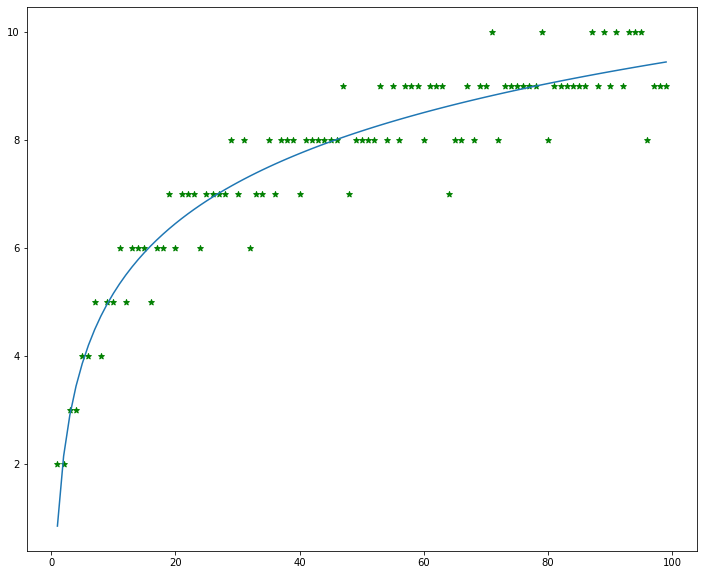

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import leastsq


x = [i for i in range(2, 201)]
for i in x:
    len_vec = []
    len_vec.append(len(division_vec(i)))
y = [len_vec[i] for i in x]
plt.figure(figsize = (10, 12))
arr = leastsq(lambda odds, y, x: y - np.log(x) * odds[0], 1, args = (y, x))
plt.plot(x, y, 'g*',  x, np.log(x) * arr[0], 'b')
plt.show()

Данный график подтверждает следствие из теоремы Брауэра т.к. видно, что $l(n)$ аппроксимируется логарифмической кривой. Это означает,что при увеличении n значение $l(n)$ будет изменяться незначительно, как и логарифмическая функция.

### Проверка гипотезы Шольца–Брауэра для 1<n⩽10

Сравним длины цепочек при разных n для проверки следующего неравенства: $l*(2^n-1)\leq l*(n)+n-1$.

In [ ]:
for i in range(4, 11):
    a = len(division_vec(2**i -  1))
    b = len(division_vec(i)) + i - 1
    #if (a <= b):
     #   print(f"Сравнение при n = {i}: a = {a} и b = {b}")

Для наглядности занесём результаты в таблицу:
    
| n    |$l(2^n-1)$| $l(n)+n-1$ |
| -----|:------------------:|:-------------:|
| 1   | 1  | 1 |
| 2   | 3  | 3 |
| 3   | 1  | 5 |
| 4   | 6  | 6 |
| 5   | 8  | 8 |
| 6   | 9  | 9 |
| 7   | 11  | 11 |
| 8   | 11  | 11 |
| 9   | 13  | 13 |
| 10   | 14  | 14 |


**Вывод:** Гипотеза Шольца-Брауэра справедлива для 1<n⩽10.

## Заключение

В практической работе были изучены и реализованы следующие алгоритмы:

1. Бинарный метод возведения в степень
2. Метод множителей при возведении в степень
3. Алгоритм Яо для построения аддитивных цепочек
4. Алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки.

Также алгоритмы для аддитивных цепочек были сопоставлены между собой, в результате чего было выяснено, что алгоритм дробления вектора индексов производит вычисления намного длительнее алгоритма Яо. Затем в практической работе были проверены проверены:

1. Первое следствие из теоремы Брауэра: $ \lim\limits_{n \rightarrow \infty} \dfrac{l \left( n \right)}{\lambda \left( n \right)} = 1 $
2. Гипотеза Шольца-Брауэра: $\;l^*(2^n-1) \leq l^*(n) + n - 1$